#### Import libs & load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

case_study = pd.read_csv('./case_study_validation_data.csv')
case_study

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,target,cat_feature_1,cat_feature_2
0,28.767169,161.966498,81.872549,99.835205,269.739988,203.647127,249.435960,117.578044,127.856154,111.061091,126.024153,177.980983,152.021918,319.135333,140.016792,112.977020,High,Category_A
1,218.938143,119.791942,167.343711,193.325205,-79.015534,53.199300,146.831591,122.634255,73.221506,79.423254,110.618714,-23.065378,133.769639,273.784216,60.854829,105.844625,Low,Category_A
2,73.635323,221.318585,99.913021,-22.305286,228.404987,111.664161,257.811522,59.378286,61.426489,86.798618,45.785137,78.697077,196.370792,-2.577077,-22.645914,93.708970,Low,Category_B
3,254.599403,9.245377,151.656239,93.377091,-31.668459,92.511416,198.598885,66.328654,232.164797,215.983485,192.334588,266.697438,147.023177,170.750747,105.240839,115.455498,Low,Category_A
4,290.040861,161.374547,70.177088,74.350879,230.188671,230.777534,251.258058,183.337692,240.107252,278.940438,183.484400,137.560854,169.524114,172.233807,0.996204,187.083308,High,Category_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.137600,223.650110,262.706014,34.115822,56.149873,203.199104,23.526109,10.265990,125.915993,174.469443,206.620790,8.447183,8.799652,62.261204,199.040973,111.933168,Low,Category_A
99996,-24.785508,54.086621,253.093477,140.302047,66.938113,113.096096,79.655440,112.177999,35.849802,187.404075,-29.669458,-29.467787,151.939305,111.344186,-19.787619,98.208574,Low,Category_A
99997,95.691137,-60.539674,182.792261,124.955195,129.011832,73.903342,72.483219,72.410532,223.346991,118.818122,-40.974059,5.113943,63.857116,142.451584,230.030930,102.714185,High,Category_A
99998,-15.557983,212.114566,-33.215685,108.988587,211.905884,291.579619,353.093819,149.118057,-23.918542,19.985540,-129.389272,154.531081,175.965241,108.808665,272.826414,91.244749,Low,Category_A


### Statistical Summary

In [2]:
case_study.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,158.513140,139.652162,147.180481,125.756441,175.975058,128.751355,179.276970,175.801288,140.617718,122.162005,126.650964,134.640968,166.591469,143.979338,166.775811,149.968626
std,114.159300,110.869556,112.414941,109.038442,116.511655,109.207081,117.665649,116.906040,111.068494,108.795315,109.308375,110.212654,115.317440,111.518974,115.624648,51.611918
min,-305.861838,-318.747340,-350.218607,-375.731688,-330.034540,-370.893909,-382.251052,-279.586495,-352.561909,-337.565310,-331.741617,-300.457268,-353.966907,-387.279560,-315.121057,54.911646
25%,80.263711,64.589940,71.074994,51.814862,96.318696,54.905107,97.796408,95.365617,65.223486,49.040553,52.568078,60.191509,87.922864,68.717045,88.251705,99.923870
50%,158.074181,139.469513,146.773685,125.737233,176.117789,128.862162,179.288034,175.785384,140.597677,122.503276,126.997673,134.519537,166.086096,143.524532,166.639325,137.634124
75%,236.915457,214.514802,223.313605,199.445756,255.506559,202.717058,260.595214,255.829105,215.780017,195.912092,200.908274,209.604255,245.594763,219.864692,246.121719,199.998115
max,661.814437,601.496775,627.201627,563.464862,725.418686,600.964263,651.261869,621.885543,593.597274,612.037658,604.555848,586.832171,622.644480,627.695222,615.176815,265.395973


### Find the feature with the highest correlation to the target variable


In [3]:
# setup X, y & feature column names
col_names_to_drop = ["target", "cat_feature_1", "cat_feature_2"]
X = case_study.drop(col_names_to_drop, axis=1)
y = case_study['target']
ft_col_names = case_study.drop(col_names_to_drop, axis=1).columns


# use Lasso regression as this will shrink coefficients of less important features
from sklearn.linear_model import Lasso
correlation_model = Lasso(alpha=0.1)
correlation_model.fit(X,y)
coefficients = correlation_model.coef_

#### Coefficients

In [4]:
cdf = pd.DataFrame(coefficients, X.columns, columns=['Coefficients'])
cdf

,Coefficients
feature_1,0.055709
feature_2,0.049252
feature_3,0.052637
feature_4,0.046486
feature_5,0.062006
feature_6,0.046203
feature_7,0.063913
feature_8,0.062816
feature_9,0.050036
feature_10,0.043379


In [5]:
plt.style.available
plt.style.use('seaborn-v0_8')

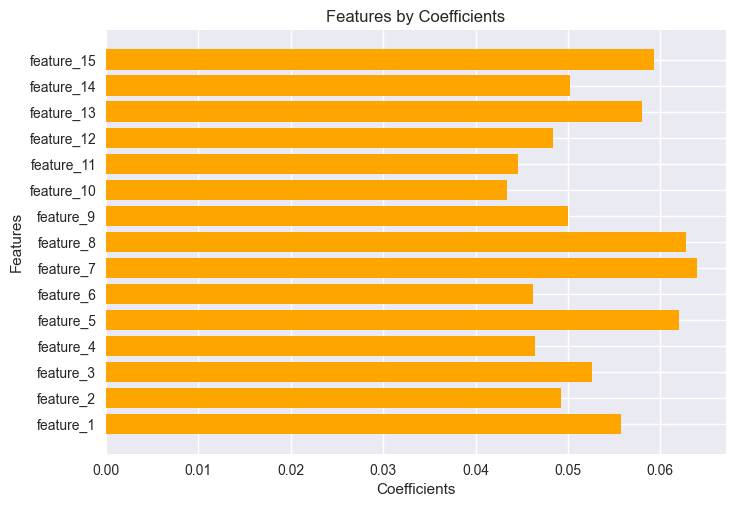

Highest correlated feature to the target variable is feature_7


In [6]:
x_index = np.arange(len(ft_col_names))
plt.barh(x_index, coefficients, 
        color="orange",label="coefficients")
plt.yticks(ticks=x_index, labels=ft_col_names)
plt.title('Features by Coefficients')
plt.xlabel('Coefficients')
plt.ylabel('Features')
# plt.legend()
# plt.grid()
# plt.tight_layout()
plt.show()

# find index of the highest correlated feature
max_index = np.argmax(np.abs(coefficients))
print('Highest correlated feature to the target variable is {}'.format(ft_col_names[max_index]))

### What is the category in cat_feature_2 with the highest mean for the target variable?

In [7]:
case_study.groupby('cat_feature_2')['target'].mean().idxmax()

'Category_C'

### What is the absolute difference of the standard deviation of the target variable for the 2 categories in cat_feature_1?

In [8]:
high_std = case_study.groupby('cat_feature_1')['target'].std()['High']
low_std = case_study.groupby('cat_feature_1')['target'].std()['Low']
np.abs(high_std - low_std)

np.float64(0.877185200149718)

### What is the min value of feature_8 for the group category C in cat_feature_2?

In [9]:
case_study.groupby('cat_feature_2')['feature_8'].min()['Category_C']

np.float64(-255.53508400442365)

### What is the variance of feature_12 for the group where cat_feature_2 is Category_A and cat_feature_1 is High?

In [10]:
var_df = case_study.groupby(['cat_feature_1', 'cat_feature_2'])[['feature_12']].var()
var_df

feature_12
cat_feature_1 cat_feature_2              
High          Category_A     11267.178830
              Category_B     11163.965640
              Category_C     10275.529924
Low           Category_A     10222.853001
              Category_B     11098.937647
              Category_C     11101.869845

In [11]:
var_df.loc[('High', 'Category_A'), 'feature_12']

np.float64(11267.178830175519)

### Build LinearRegression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error

#### Preprocessing

In [13]:
x = case_study.drop(['target'], axis=1)
y = case_study['target']

x_features = case_study.drop(['target'], axis=1)
y_features = case_study['target']

# split train 70% data & 30% test data
X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.3, random_state=42)

In [14]:
# TODO
# one-hot encoding for cat_feature_1
# ordinal encoding for cat_feature_2
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
from sklearn.compose import ColumnTransformer

In [16]:
print(f'cat feature 1 columns: {x_features['cat_feature_1'].unique()}')
print(f'cat feature 2 columns: {x_features['cat_feature_2'].unique()}')

cat feature 1 columns: ['High' 'Low']
cat feature 2 columns: ['Category_A' 'Category_B' 'Category_C']


In [17]:
# One Hot Encoding on cat_feature_1 column
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")
ohe.fit_transform(case_study[['cat_feature_1']])

,cat_feature_1_High,cat_feature_1_Low
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
99995,0.0,1.0
99996,0.0,1.0
99997,1.0,0.0
99998,0.0,1.0


In [18]:
# OrdinalEncode cat feature 1
cat_feat_1_cols = x_features['cat_feature_1'].unique()
cat_feat_1_pipeline = Pipeline(steps = [
    ('cat-feat-1-pipeline', OrdinalEncoder(categories=[cat_feat_1_cols])),
])
cat_feat_1_pipeline

Pipeline(steps=[('cat-feat-1-pipeline',
                 OrdinalEncoder(categories=[array(['High', 'Low'], dtype=object)]))])

In [19]:
cat_feat_2_cols = x_features['cat_feature_2'].unique()
cat_feat_2_pipeline = Pipeline(steps = [
    ('cat-feat-2-pipeline', OrdinalEncoder(categories=[cat_feat_2_cols])),
])
cat_feat_2_pipeline

Pipeline(steps=[('cat-feat-2-pipeline',
                 OrdinalEncoder(categories=[array(['Category_A', 'Category_B', 'Category_C'], dtype=object)]))])

In [20]:
scale_cols = [
    'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
    'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
    'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']

In [21]:
col_transformer = ColumnTransformer(transformers = [
        ('cat-feat-1-pipeline', cat_feat_1_pipeline, ['cat_feature_1']),
        ('cat-feat-2-pipeline', cat_feat_2_pipeline, ['cat_feature_2']),
        ('scale', StandardScaler(), scale_cols),
        ('impute', SimpleImputer(strategy='mean'), scale_cols),
    ],
    remainder = 'drop',
    n_jobs = -1
)

In [22]:
cat_feat_1_encode = OrdinalEncoder(categories=[cat_feat_1_cols])
cat_feat_1_encode.fit_transform(case_study[['cat_feature_1']])

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [23]:
cat_feat_2_encode = OrdinalEncoder(categories=[cat_feat_2_cols])
cat_feat_2_encode.fit_transform(case_study[['cat_feature_2']])

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [2.]])

In [24]:
lin_reg = LinearRegression()

In [25]:
final_pipeline = make_pipeline(col_transformer, lin_reg)

In [26]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat-feat-1-pipeline',
                                                  Pipeline(steps=[('cat-feat-1-pipeline',
                                                                   OrdinalEncoder(categories=[array(['High', 'Low'], dtype=object)]))]),
                                                  ['cat_feature_1']),
                                                 ('cat-feat-2-pipeline',
                                                  Pipeline(steps=[('cat-feat-2-pipeline',
                                                                   OrdinalEncoder(categories=[array(['Category_A', 'Category_B', '...
                                                   'feature_9', 'feature_10',
                                                   'feature_11', 'feature_12',
                                                   'feature_13', 'feature_14',
                                                   'feature_15']),
                                                 ('impute', SimpleImputer(),
                                                  ['feature_1', 'feature_2',
                                                   'feature_3', 'feature_4',
                                                   'feature_5', 'feature_6',
                                                   'feature_7', 'feature_8',
                                                   'feature_9', 'feature_10',
                                                   'feature_11', 'feature_12',
                                                   'feature_13', 'feature_14',
                                                   'feature_15'])])),
                ('linearregression', LinearRegression())])

#### Calculate the predictions

In [27]:
predictions = final_pipeline.predict(X_test)
score = final_pipeline.score(X_test, y_test)


#### Calculate scores

In [28]:
rmse = root_mean_squared_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print('Predictions: {} '.format(predictions))
print('Score: {}'.format(score))

print('Mean Squared Error {}'.format(mse))
print('RMSE score {}'.format(rmse))

Predictions: [198.19703183 108.70775589 121.58849914 ... 182.10437467 187.35080092
  87.86894498] 
Score: 0.8713621950653462
Mean Squared Error 342.672764284296
RMSE score 18.51142253540489


#### Visualize predictions on a scatter plot

In [29]:
len(X_test.values), y_test.shape

(30000, (30000,))

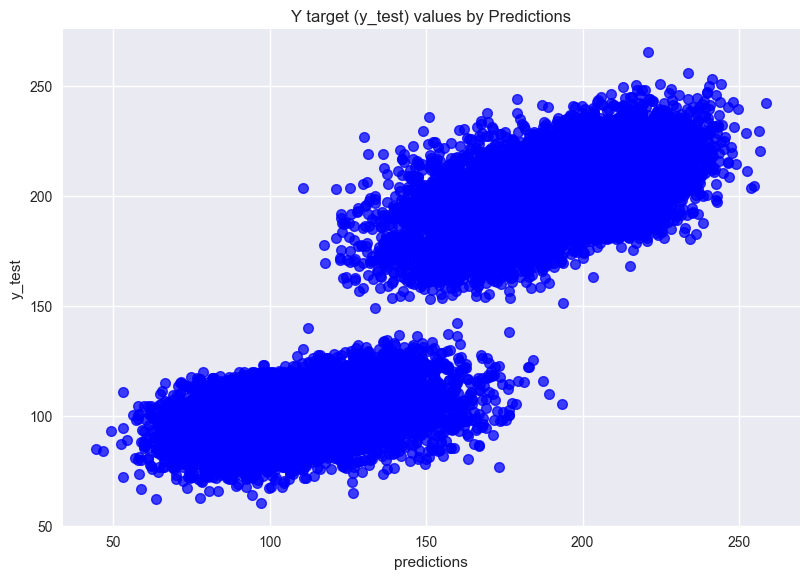

In [30]:
plt.scatter(predictions, y_test, color="blue", alpha=0.75, linewidth=1)

plt.tight_layout()

plt.xlabel("predictions")
plt.ylabel("y_test")
plt.title('Y target (y_test) values by Predictions')

plt.grid(True)

plt.show()

### Preprocessing

In [100]:
# define categorical & continuous features columns
cat_cols = ['cat_feature_1', 'cat_feature_2']
scale_cols = [
    'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
    'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
    'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15'
]

In [152]:
# pipeline for categorical features
cat_feat_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('cat_encode', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
])
cat_feat_pipeline

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('cat_encode',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [153]:
# pipeline for continuous features
cont_feat_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
])
cont_feat_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [161]:
# column transformer
col_transformer = ColumnTransformer(transformers = [
        ('cat_encode', cat_feat_pipeline, cat_cols),
        ('scale', cont_feat_pipeline, scale_cols),
    ],
    remainder="drop",
    n_jobs=-1,
    verbose_feature_names_out=False
)
col_transformer

ColumnTransformer(n_jobs=-1,
                  transformers=[('cat_encode',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('cat_encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['cat_feature_1', 'cat_feature_2']),
                                ('scale',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['feature_1', 'feature_2', 'feature_3',
                                  'feature_4', 'feature_5', 'feature_6',
                                  'feature_7', 'feature_8', 'feature_9',
                                  'feature_10', 'feature_11', 'feature_12',
                                  'feature_13', 'feature_14', 'feature_15'])],
                  verbose_feature_names_out=False)

In [162]:
x = case_study.drop(['target'], axis=1)
y = case_study['target']

x_features = case_study.drop(['target'], axis=1)
y_features = case_study['target']

# split train 70% data & 30% test data
X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.3, random_state=42)

In [163]:
final_pipeline_2 = Pipeline(steps = [
    ('preprocessor', col_transformer),
    ('regressor', LinearRegression()),
])

final_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['cat_feature_1',
                                                   'cat_feature_2']),
                                                 ('scale',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['feature_1', 'feature_2',
                                                   'feature_3', 'feature_4',
                                                   'feature_5', 'feature_6',
                                                   'feature_7', 'feature_8',
                                                   'feature_9', 'feature_10',
                                                   'feature_11', 'feature_12',
                                                   'feature_13', 'feature_14',
                                                   'feature_15'])],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression())])

#### Calculate predictions

In [164]:
predictions_2 = final_pipeline_2.predict(X_test)
score = final_pipeline_2.score(X_test, y_test)

##### scores

In [165]:
rmse = root_mean_squared_error(y_test, predictions_2)
mse = mean_squared_error(y_test, predictions_2)

print('Predictions: {} '.format(predictions_2))
print('Score: {}'.format(score))

print('Mean Squared Error {}'.format(mse))
print('RMSE score {}'.format(rmse))

Predictions: [198.19703183 108.70775589 121.58849914 ... 182.10437467 187.35080092
  87.86894498] 
Score: 0.8713621950653462
Mean Squared Error 342.67276428429597
RMSE score 18.51142253540489


### Save model

In [166]:
import pickle

In [167]:
with open('model.pkl', 'wb') as file:
    pickle.dump(final_pipeline_2, file)
